In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import path
from PIL import Image

from keras.models import model_from_json
from keras import backend as K
from keras.utils.visualize_util import plot

from model import load_data

Using TensorFlow backend.


In [2]:
# Load the training data
df = pd.read_csv('data/driving_log.csv')

In [34]:
# Pick a sample image to display
img_file = df.reindex(np.random.permutation(df.index)).center.iloc[0]
img = Image.open(path.join('data', img_file.strip()))

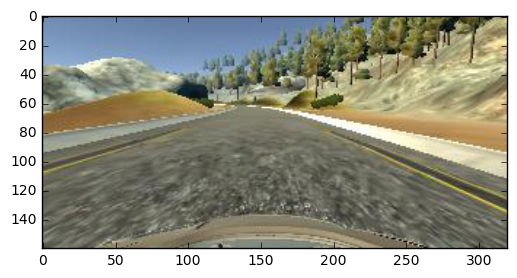

In [35]:
_ = plt.imshow(img)

In [36]:
# Convert to HSV colour space
processed_img = img.convert(mode='HSV')

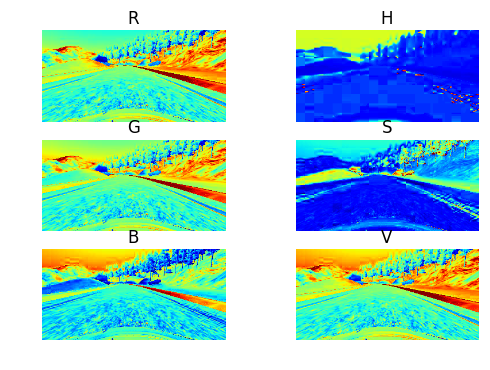

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax1.imshow(np.asarray(img)[:,:,0])
ax1.set_axis_off()
ax1.set_title('R')

ax2 = fig.add_subplot(323)
ax2.imshow(np.asarray(img)[:,:,1])
ax2.set_axis_off()
ax2.set_title('G')

ax3 = fig.add_subplot(325)
ax3.imshow(np.asarray(img)[:,:,2])
ax3.set_axis_off()
ax3.set_title('B')


ax1 = fig.add_subplot(322)
ax1.imshow(np.asarray(processed_img)[:,:,0])
ax1.set_axis_off()
ax1.set_title('H')

ax2 = fig.add_subplot(324)
ax2.imshow(np.asarray(processed_img)[:,:,1])
ax2.set_axis_off()
ax2.set_title('S')

ax3 = fig.add_subplot(326)
ax3.imshow(np.asarray(processed_img)[:,:,2])
ax3.set_axis_off()
ax3.set_title('V')

fig.savefig('colour_channels.png')

In [4]:
# Load model and weights
with open('model.json', 'r') as file:
    model = model_from_json(file.read())
model.compile('adam', 'mse')
model.load_weights('model.h5')
# Load training data
df = pd.read_csv('data/driving_log.csv')
gen = load_data('data', df, 128, camera='center')
# Create predictions
predictions = model.predict_generator(gen, len(df) - len(df) % 128)
print('Mean angle: ', np.mean(predictions))

In [5]:
K.clear_session()

In [17]:
# Output diagram of model architecture
plot(model, to_file='model.png')

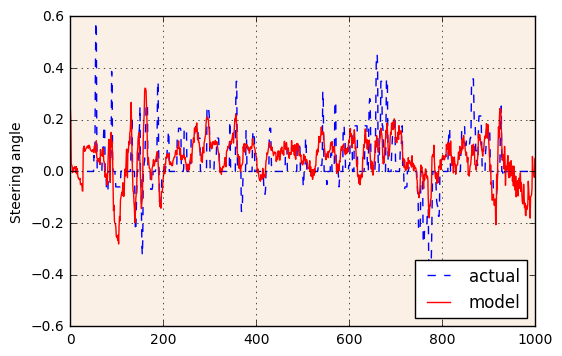

In [5]:
# Plot to file
plot_length = 1000

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.index[:plot_length], df.steering.iloc[:plot_length], ls='--', color='b', label='actual')
ax.plot(df.index[:plot_length], predictions[:plot_length], ls='-', color='r', label='model')
ax.grid()
ax.set_axis_bgcolor('linen')
ax.legend(loc='lower right')
ax.set_xlim([0, plot_length])
ax.set_ylabel('Steering angle')
plt.savefig('plot.png')